In [1]:
#from __future__ import division # If in Python 2
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
print(plt.get_backend())

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

from cycler import cycler
import lmfit

# use latex fonts/mathematica color scheme
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('font', family='serif')
#matplotlib.verbose.level = 'debug-annoying'
#matplotlib.rcParams['mathtext.fontset'] = 'cm'

matplotlib.rcParams.get('font.sans-serif').insert(0,u'Myriad Web Pro')
matplotlib.rcParams.get('font.serif').remove(u'Times')
matplotlib.rcParams.get('font.serif').insert(0,u'Times')

plotparams = {'legend.fontsize'      : 10,
              'figure.figsize'       : (3.25, 2.75),
              'figure.dpi'           : 300,
              'axes.labelsize'       : 7,
              'axes.titlesize'       : 7,
              'xtick.labelsize'      : 7,
              'ytick.labelsize'      : 7,
              'figure.subplot.bottom': 0.1,
              'figure.subplot.hspace': 0.1,
              'figure.subplot.left'  : 0.125,
              'figure.subplot.right' : 0.95,
              'figure.subplot.top'   : 0.95,
              'figure.subplot.wspace': 0.1,
              'mathtext.fontset'     : 'custom',
              'mathtext.rm'          : matplotlib.rcParams.get('font.sans-serif')[0],
              'mathtext.it'          : matplotlib.rcParams.get('font.sans-serif')[0] + u':italic',
              'mathtext.bf'          : matplotlib.rcParams.get('font.sans-serif')[0] + u':bold',
              'mathtext.sf'          : matplotlib.rcParams.get('font.sans-serif')[0]}

matplotlib.rcParams.update(plotparams)

# cyclers for colors and line styles
line_cycle = cycler('linestyle', ["-","-.","--"])

#color_cycle_trimmed = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
color_cycle = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
clrs = ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"]
clrs2 = ["#e18e9c", "#53c0da", "#c0af6f", "#b5a0dd", "#71c19b"]
clrs3 = ["#900094", "#c799ff", "#002ecd"]

nbAgg


In [2]:
data = np.array([[1, 1000],[4.4, 3.9],[0.018, 0.013]]).transpose()
df = pd.DataFrame(data, columns = ['freq','Er','tanD'])
df

,freq,Er,tanD
0,1.0,4.4,0.018
1,1000.0,3.9,0.013


In [3]:
def RPerm(x, e_s, e_inf, tau):
    return (e_inf + (e_s - e_inf)/(1 + (2*np.pi*x*tau)**2))
def TanD(x, e_s, e_inf, tau):
    return ((e_s - e_inf)*2*np.pi*x*tau/(e_s + e_inf*(2*np.pi*x*tau)**2))
def Debye_fit(params, x, ErData = None, TanDData = None):
    vals = params.valuesdict()
    Model1 = RPerm(x, vals['e_s'], vals['e_inf'], vals['tau'])
    Model2 = TanD(x, vals['e_s'], vals['e_inf'], vals['tau'])
    resid1 = ErData - Model1
    resid2 = TanDData - Model2
    return np.concatenate((resid1, resid2))

<IPython.core.display.Javascript object>


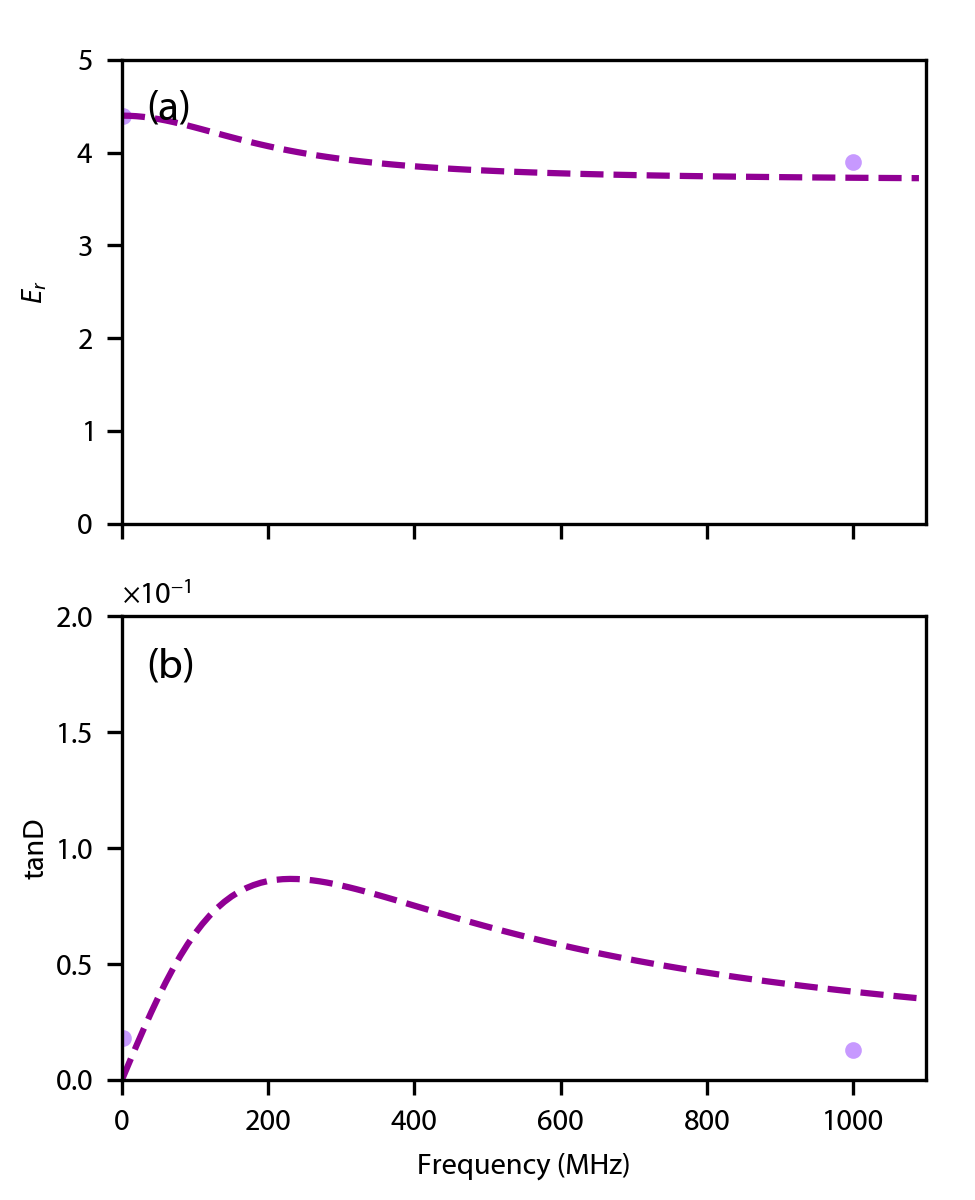

In [4]:
xplot = np.arange(0,1100,10)
fit_pars = lmfit.Parameters()
fit_pars.add('e_s', value = 4.4)
fit_pars.add('e_inf', value = 3.7)
fit_pars.add('tau', value = 0.00075)
vals = fit_pars.valuesdict()

matplotlib.rc('axes', prop_cycle = color_cycle)
formatter = mtick.ScalarFormatter(useMathText=True)

fig = plt.figure(figsize=(3.25,4))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace = 0.2)

ax = fig.add_subplot(gs[0,0])
plt.setp(ax.get_xticklabels(), visible=False)
e1 = ax.plot(df['freq'], df['Er'], marker = 'o', ms = 3, linestyle='None', color = clrs3[1], \
        label = r'$E_r$ Data')
e2 = ax.plot(xplot, RPerm(xplot, vals['e_s'], vals['e_inf'], vals['tau']), linestyle='dashed', color = clrs3[0], \
        label = r'Debye Model')
ax.set_xlim(0,1100)
ax.set_ylim(0,5)
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#et = [e1, e2]
#ax.legend(et,[H.get_label() for H in et], loc='lower right', fontsize = 8)
ax.set_ylabel(r'$E_r$')
fig.text(.15, .9, '(a)', fontsize=10)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(df['freq'], df['tanD'], marker = 'o', ms = 3, linestyle='None', color = clrs3[1], \
        label = r'$TanD$ Data')
ax2.plot(xplot, TanD(xplot, vals['e_s'], vals['e_inf'], vals['tau']), linestyle='dashed', color = clrs3[0], \
        label = r'Debye Model')
ax2.set_xlim(0,1100)
ax2.set_ylim(0,0.2)
ax2.yaxis.set_major_formatter(formatter)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_ylabel(r'tanD')
fig.text(.15, .435, '(b)', fontsize=10)
ax2.set_xlabel('Frequency (MHz)')
ax.get_yaxis().set_label_coords(-0.09,0.5)
ax2.get_yaxis().set_label_coords(-0.09,0.5)
plt.show()

In [5]:
fit_pars = lmfit.Parameters()
fit_pars.add('e_s', value = 4.4)
fit_pars.add('e_inf', value = 3.5)
fit_pars.add('tau', value = 0.0005)
out = lmfit.minimize(Debye_fit, fit_pars, args = (df['freq'],), kws = {'ErData':df['Er'], 'TanDData':df['tanD']})
print(lmfit.fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 4
    # variables        = 3
    chi-square         = 2.8173e-04
    reduced chi-square = 2.8173e-04
    Akaike info crit   = -32.2434572
    Bayesian info crit = -34.0845741
[[Variables]]
    e_s:    4.40015155 +/- 0.01679252 (0.38%) (init = 4.4)
    e_inf:  3.89621972 +/- 0.02003574 (0.51%) (init = 3.5)
    tau:    0.00185399 +/- 0.00280654 (151.38%) (init = 0.0005)
[[Correlations]] (unreported correlations are < 0.100)
    C(e_inf, tau) =  0.537


<IPython.core.display.Javascript object>


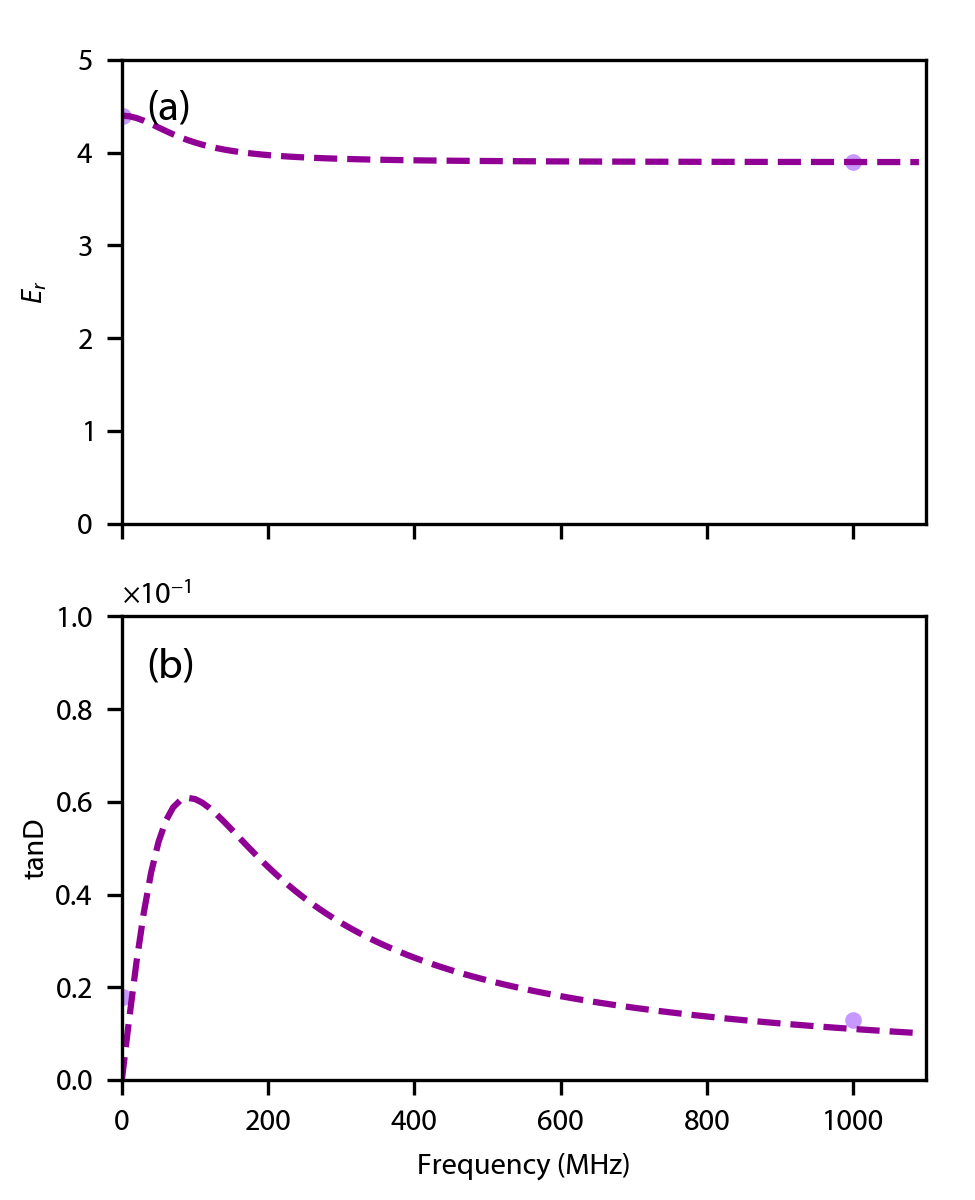

In [6]:
xplot = np.arange(0,1100,10)
fit_pars = out.params
vals = fit_pars.valuesdict()

matplotlib.rc('axes', prop_cycle = color_cycle)
formatter = mtick.ScalarFormatter(useMathText=True)

fig = plt.figure(figsize=(3.25,4))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace = 0.2)

ax = fig.add_subplot(gs[0,0])
plt.setp(ax.get_xticklabels(), visible=False)
e1 = ax.plot(df['freq'], df['Er'], marker = 'o', ms = 3, linestyle='None', color = clrs3[1], \
        label = r'$E_r$ Data')
e2 = ax.plot(xplot, RPerm(xplot, vals['e_s'], vals['e_inf'], vals['tau']), linestyle='dashed', color = clrs3[0], \
        label = r'Debye Model')
ax.set_xlim(0,1100)
ax.set_ylim(0,5)
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#et = [e1, e2]
#ax.legend(et,[H.get_label() for H in et], loc='lower right', fontsize = 8)
ax.set_ylabel(r'$E_r$')
fig.text(.15, .9, '(a)', fontsize=10)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(df['freq'], df['tanD'], marker = 'o', ms = 3, linestyle='None', color = clrs3[1], \
        label = r'$TanD$ Data')
ax2.plot(xplot, TanD(xplot, vals['e_s'], vals['e_inf'], vals['tau']), linestyle='dashed', color = clrs3[0], \
        label = r'Debye Model')
ax2.set_xlim(0,1100)
ax2.set_ylim(0,0.1)
ax2.yaxis.set_major_formatter(formatter)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_ylabel(r'tanD')
fig.text(.15, .435, '(b)', fontsize=10)
ax2.set_xlabel('Frequency (MHz)')
ax.get_yaxis().set_label_coords(-0.09,0.5)
ax2.get_yaxis().set_label_coords(-0.09,0.5)
plt.show()